In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import re
import glob
import subprocess
import pandas as pd
import numpy as np

from my_utils import *


In [3]:
experiment_folder = 'data-dyrka'
#experiment_folder = 'data-perk-exp2'
#experiment_folder = 'data_setd5_exp3'


# Verfiy all necessary files

# Check if there are files in the divided/{div_type}/ directory that match the pattern r_*{div_type}.nii.gz.
DIV_TYPE_ls = ["C0divC1", "C2divC1"]  # List of division types
DIV_TYPE_ls_valid = []  # List of valid division types

for div_type in DIV_TYPE_ls:
    pattern = f"{experiment_folder}/divided/{div_type}/r_*{div_type}.nii.gz"
    files = glob.glob(pattern)
    check_files(pattern)
    if files:  # keep only valid division types
        DIV_TYPE_ls_valid.append(div_type)

# verify auxiliary files atlas e header
regions_ls = [4, 8, 149] # or from input  # reg_ls = sys.argv[1:]  # TODO
for region in regions_ls:
    ATLAS = f"aux/02-roi/Zbrain_atlas_{region}region.nii.gz"
    HEADER = f"aux/02-roi/roi_{region}region_header.csv"
    #print(f"Region: {region}, Atlas: {ATLAS}, Header: {HEADER}")
    
    check_files(ATLAS)
    check_files(HEADER)

26 Files found for pattern: data-dyrka/divided/C0divC1/r_*C0divC1.nii.gz
0 files found for pattern: data-dyrka/divided/C2divC1/r_*C2divC1.nii.gz
1 Files found for pattern: aux/02-roi/Zbrain_atlas_4region.nii.gz
1 Files found for pattern: aux/02-roi/roi_4region_header.csv
1 Files found for pattern: aux/02-roi/Zbrain_atlas_8region.nii.gz
1 Files found for pattern: aux/02-roi/roi_8region_header.csv
1 Files found for pattern: aux/02-roi/Zbrain_atlas_149region.nii.gz
1 Files found for pattern: aux/02-roi/roi_149region_header.csv


In [ ]:
# SLURM script starts HERE - INPUT: region.
# iterate on regions_ls TODO
region = 8
#region = 4
region = 149

#for div_type in DIV_TYPE_ls: # TODO
div_type = DIV_TYPE_ls[0] # take the first one for now   

# Prepare OUTPUT folder
roi_folder = f"{experiment_folder}/roi_{region}region/{div_type}" 
os.makedirs(roi_folder, exist_ok=True)

# Get the list of matching files from divided/{div_type}/
file_pattern = f"{experiment_folder}/divided/{div_type}/r_*{div_type}.nii.gz"
files = glob.glob(file_pattern)

# Look for files in divided/{div_type} that match the pattern r_*{div_type}.nii.gz



list_comm = []
for file_path in files:
    file_name = os.path.basename(file_path)

    zbrain_file = f"aux/02-roi/Zbrain_atlas_{region}region.nii.gz" 

    roi_csv_file = file_name.replace(".nii.gz", f"_{region}_roi.csv")
    file_output = f"{roi_folder}/{roi_csv_file}"
    
    command = f"biswebnode computeroi -i {file_path} -r {zbrain_file} -o {file_output}"
    #print(command)
    #run_command(command)
    list_comm.append(command)

    # print input and output files
    #print(f"INPUT: {file_path}")
    #print(f"OUTPUT: {file_output}")

#run_commands_parallel(list_comm)

In [27]:
# check reference csv, a bit different between regions # eg 149 missing Values row
#region = 4
header_file = f"aux/02-roi/roi_{region}region_header_my.csv"
header_df = pd.read_csv(header_file)
header_df


,Name,Region 1_Diencephalon,Region 4_Anterior-pretectum-cluster-of-vmat2-Neurons,Region 5_Caudal-Hypothalamus,Region 6_Diffuse-Nucleus-of-the-Intermediate-Hypothalamus,Region 8_Dopaminergic-Cluster-2-posterior-tuberculum,Region 9_Dopaminergic-Cluster-3-hypothalamus,Region 11_Dopaminergic-Cluster-6-hypothalamus,Region 12_Dopaminergic-Cluster-7-Caudal-Hypothalamus,Region 13_Dorsal-Thalamus,...,Region 284_Postoptic-Commissure,Region 286_Subpallial-Gad1b-cluster,Region 287_Subpallial-Otpb-Cluster-2,Region 288_Subpallial-Otpb-strip,Region 289_Subpallial-Vglut2-Cluster,Region 290_Subpallial-dopaminergic-cluster,Region 291_Subpallium,Region 292_Telencephalic-Migrated-Area-4-(M4),Region 293_Vglut2-rind,Region 294_Vmat2-cluster


In [6]:
roi_folder = f"{experiment_folder}/roi_{region}region/{div_type}"
all_files = glob.glob(f"{roi_folder}/r_*{div_type}*_roi.csv")
all_files
df_from_each_file = []
# its just one row per file
for f in sorted(all_files):
    df = pd.read_csv(f, header=None)  # Read the file without headers
    filename = os.path.basename(f) # Extract filename
    #filename = filename.replace("divC1_4_roi.csv", "") # remove suffix - they add "divC1_4_"
    filename = filename.replace(f"_C0divC1_{region}_roi.csv", "") # remove suffix - mine
    filename = filename.replace("r_", "") # remove prefix
    df.insert(0, "Filename", filename)  # Insert column - filename as the first column
    df_from_each_file.append(df)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df


,Filename,0,1,2,3,4,5,6,7,8,...,284,285,286,287,288,289,290,291,292,293
0,dyrk1a_exp1_het_1,0.455039,0,0,0.763406,0.511068,0.144270,0,0.588740,1.356956,...,0,1.130789,0.930457,1.020127,0.228268,1.083800,0.903242,0.492569,0.588561,1.179970
1,dyrk1a_exp1_het_2,0.213649,0,0,0.409655,0.017339,0.124262,0,0.312002,0.144369,...,0,0.609290,0.595885,0.263683,0.156991,0.356622,0.658298,0.457203,0.374272,0.744431
2,dyrk1a_exp1_het_3,0.497341,0,0,0.994471,0.108241,0.098298,0,0.571568,2.113751,...,0,0.433729,0.565320,0.311359,0.132171,0.606195,0.447757,0.174067,0.256391,0.499011
3,dyrk1a_exp1_het_4,0.318597,0,0,0.585941,0.000156,0.148958,0,0.389886,1.115766,...,0,0.622157,0.469040,0.207345,0.333329,0.625101,0.589507,0.386423,0.297127,0.708944
4,dyrk1a_exp1_het_5,0.204511,0,0,0.499907,0.000000,0.175995,0,0.337555,0.698875,...,0,0.693476,0.422966,0.568356,0.150143,0.398751,0.518541,0.277042,0.403985,0.634619
5,dyrk1a_exp1_het_6,0.260675,0,0,0.515338,0.100942,0.114737,0,0.344518,0.762121,...,0,0.750285,0.731921,0.429503,0.109245,0.980654,0.566576,0.242782,0.396183,0.758736
6,dyrk1a_exp1_het_7,0.410413,0,0,0.828619,0.061748,0.315486,0,0.453630,1.294419,...,0,0.450471,0.560606,0.338872,0.002128,0.797520,0.447119,0.182950,0.268742,0.663069
7,dyrk1a_exp1_het_8,0.249472,0,0,0.317207,0.059148,0.107666,0,0.562480,0.335463,...,0,0.781568,1.426025,0.382985,0.322556,0.341330,0.714086,0.440516,0.464998,0.644954
8,dyrk1a_exp1_het_9,0.390562,0,0,0.731821,0.208278,0.252247,0,0.471897,1.392875,...,0,0.934633,0.777895,0.872904,0.343188,1.127564,0.693233,0.304772,0.388193,0.825023
9,dyrk1a_exp1_hom_10,0.417356,0,0,0.735865,0.259569,0.046840,0,0.525893,1.333591,...,0,0.470863,0.617402,0.227456,0.173158,0.684880,0.501383,0.188415,0.229726,0.600987


In [7]:
# SPECIAL case for 149
# they remove columns with long filter of columns
# select _column="1,4-6,8,9,11-16,18-32,34,35,36,39-46,48-53,55-77,94-97,100,102-113,116,124,130-135,142,144,145,146,148,150,152,153,176,178,182,183,199,201,204-208,212,213,214,218,219,220,221,226-232,236,237,241,242,247,275-284,286-294"

# in practice they remove columns with all 0
if region == 149:
    # remove columns with all 0
    concatenated_df = concatenated_df.loc[:, (concatenated_df != 0).any(axis=0)]
    concatenated_df # VERIFY 

In [8]:
# append to the header and check final 
concatenated_df.columns = header_df.columns
concatenated_df = pd.concat([header_df, concatenated_df], ignore_index=True)
concatenated_df

/tmp/ipykernel_1980419/3842385242.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  concatenated_df = pd.concat([header_df, concatenated_df], ignore_index=True)


,Name,Region 1_Diencephalon,Region 4_Anterior-pretectum-cluster-of-vmat2-Neurons,Region 5_Caudal-Hypothalamus,Region 6_Diffuse-Nucleus-of-the-Intermediate-Hypothalamus,Region 8_Dopaminergic-Cluster-2-posterior-tuberculum,Region 9_Dopaminergic-Cluster-3-hypothalamus,Region 11_Dopaminergic-Cluster-6-hypothalamus,Region 12_Dopaminergic-Cluster-7-Caudal-Hypothalamus,Region 13_Dorsal-Thalamus,...,Region 284_Postoptic-Commissure,Region 286_Subpallial-Gad1b-cluster,Region 287_Subpallial-Otpb-Cluster-2,Region 288_Subpallial-Otpb-strip,Region 289_Subpallial-Vglut2-Cluster,Region 290_Subpallial-dopaminergic-cluster,Region 291_Subpallium,Region 292_Telencephalic-Migrated-Area-4-(M4),Region 293_Vglut2-rind,Region 294_Vmat2-cluster
0,dyrk1a_exp1_het_1,0.455039,0.763406,0.511068,0.144270,0.588740,1.356956,0.961538,0.607981,0.992480,...,0.072004,1.130789,0.930457,1.020127,0.228268,1.083800,0.903242,0.492569,0.588561,1.179970
1,dyrk1a_exp1_het_2,0.213649,0.409655,0.017339,0.124262,0.312002,0.144369,0.026282,0.136150,0.417930,...,0.013667,0.609290,0.595885,0.263683,0.156991,0.356622,0.658298,0.457203,0.374272,0.744431
2,dyrk1a_exp1_het_3,0.497341,0.994471,0.108241,0.098298,0.571568,2.113751,1.021154,0.000000,1.045869,...,0.205922,0.433729,0.565320,0.311359,0.132171,0.606195,0.447757,0.174067,0.256391,0.499011
3,dyrk1a_exp1_het_4,0.318597,0.585941,0.000156,0.148958,0.389886,1.115766,0.000000,0.000000,0.740354,...,0.208791,0.622157,0.469040,0.207345,0.333329,0.625101,0.589507,0.386423,0.297127,0.708944
4,dyrk1a_exp1_het_5,0.204511,0.499907,0.000000,0.175995,0.337555,0.698875,0.240128,0.000000,0.468959,...,0.010878,0.693476,0.422966,0.568356,0.150143,0.398751,0.518541,0.277042,0.403985,0.634619
5,dyrk1a_exp1_het_6,0.260675,0.515338,0.100942,0.114737,0.344518,0.762121,0.409615,0.256808,0.701954,...,0.038631,0.750285,0.731921,0.429503,0.109245,0.980654,0.566576,0.242782,0.396183,0.758736
6,dyrk1a_exp1_het_7,0.410413,0.828619,0.061748,0.315486,0.453630,1.294419,0.658334,0.265024,1.048121,...,0.234059,0.450471,0.560606,0.338872,0.002128,0.797520,0.447119,0.182950,0.268742,0.663069
7,dyrk1a_exp1_het_8,0.249472,0.317207,0.059148,0.107666,0.562480,0.335463,0.235256,0.000000,0.357119,...,0.030981,0.781568,1.426025,0.382985,0.322556,0.341330,0.714086,0.440516,0.464998,0.644954
8,dyrk1a_exp1_het_9,0.390562,0.731821,0.208278,0.252247,0.471897,1.392875,0.748077,0.441315,0.991705,...,0.077790,0.934633,0.777895,0.872904,0.343188,1.127564,0.693233,0.304772,0.388193,0.825023
9,dyrk1a_exp1_hom_10,0.417356,0.735865,0.259569,0.046840,0.525893,1.333591,0.808013,0.585211,0.807544,...,0.222311,0.470863,0.617402,0.227456,0.173158,0.684880,0.501383,0.188415,0.229726,0.600987


In [9]:
# save 
#combined_file = f"{roi_folder}/_roi_{region}region_{div_type}_combined.csv"
#concatenated_df.to_csv(combined_file, index=False)

# save as excel
#combined_file = f"{roi_folder}/_roi_{region}region_{div_type}_combined.xlsx"
#concatenated_df.to_excel(combined_file, index=False)


In [16]:
concatenated_df
# remove C0divC1 from name
#concatenated_df['Name'] = concatenated_df['Name'].str.replace('C0divC1_', '')
concatenated_df
concatenated_df['Group'] = concatenated_df['Name'].str.extract(r'(het|hom|wt)', expand=True)
#concatenated_df['Group'] = concatenated_df['Name'].str.extract(r'([A-D])', expand=True) # extract the letter from A-D if
# move Group to the second column
cols = concatenated_df.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:-1]
concatenated_df = concatenated_df[cols]
concatenated_df

,Name,Group,Region 1_Diencephalon,Region 4_Anterior-pretectum-cluster-of-vmat2-Neurons,Region 5_Caudal-Hypothalamus,Region 6_Diffuse-Nucleus-of-the-Intermediate-Hypothalamus,Region 8_Dopaminergic-Cluster-2-posterior-tuberculum,Region 9_Dopaminergic-Cluster-3-hypothalamus,Region 11_Dopaminergic-Cluster-6-hypothalamus,Region 12_Dopaminergic-Cluster-7-Caudal-Hypothalamus,...,Region 284_Postoptic-Commissure,Region 286_Subpallial-Gad1b-cluster,Region 287_Subpallial-Otpb-Cluster-2,Region 288_Subpallial-Otpb-strip,Region 289_Subpallial-Vglut2-Cluster,Region 290_Subpallial-dopaminergic-cluster,Region 291_Subpallium,Region 292_Telencephalic-Migrated-Area-4-(M4),Region 293_Vglut2-rind,Region 294_Vmat2-cluster
0,dyrk1a_exp1_het_1,het,0.455039,0.763406,0.511068,0.144270,0.588740,1.356956,0.961538,0.607981,...,0.072004,1.130789,0.930457,1.020127,0.228268,1.083800,0.903242,0.492569,0.588561,1.179970
1,dyrk1a_exp1_het_2,het,0.213649,0.409655,0.017339,0.124262,0.312002,0.144369,0.026282,0.136150,...,0.013667,0.609290,0.595885,0.263683,0.156991,0.356622,0.658298,0.457203,0.374272,0.744431
2,dyrk1a_exp1_het_3,het,0.497341,0.994471,0.108241,0.098298,0.571568,2.113751,1.021154,0.000000,...,0.205922,0.433729,0.565320,0.311359,0.132171,0.606195,0.447757,0.174067,0.256391,0.499011
3,dyrk1a_exp1_het_4,het,0.318597,0.585941,0.000156,0.148958,0.389886,1.115766,0.000000,0.000000,...,0.208791,0.622157,0.469040,0.207345,0.333329,0.625101,0.589507,0.386423,0.297127,0.708944
4,dyrk1a_exp1_het_5,het,0.204511,0.499907,0.000000,0.175995,0.337555,0.698875,0.240128,0.000000,...,0.010878,0.693476,0.422966,0.568356,0.150143,0.398751,0.518541,0.277042,0.403985,0.634619
5,dyrk1a_exp1_het_6,het,0.260675,0.515338,0.100942,0.114737,0.344518,0.762121,0.409615,0.256808,...,0.038631,0.750285,0.731921,0.429503,0.109245,0.980654,0.566576,0.242782,0.396183,0.758736
6,dyrk1a_exp1_het_7,het,0.410413,0.828619,0.061748,0.315486,0.453630,1.294419,0.658334,0.265024,...,0.234059,0.450471,0.560606,0.338872,0.002128,0.797520,0.447119,0.182950,0.268742,0.663069
7,dyrk1a_exp1_het_8,het,0.249472,0.317207,0.059148,0.107666,0.562480,0.335463,0.235256,0.000000,...,0.030981,0.781568,1.426025,0.382985,0.322556,0.341330,0.714086,0.440516,0.464998,0.644954
8,dyrk1a_exp1_het_9,het,0.390562,0.731821,0.208278,0.252247,0.471897,1.392875,0.748077,0.441315,...,0.077790,0.934633,0.777895,0.872904,0.343188,1.127564,0.693233,0.304772,0.388193,0.825023
9,dyrk1a_exp1_hom_10,hom,0.417356,0.735865,0.259569,0.046840,0.525893,1.333591,0.808013,0.585211,...,0.222311,0.470863,0.617402,0.227456,0.173158,0.684880,0.501383,0.188415,0.229726,0.600987


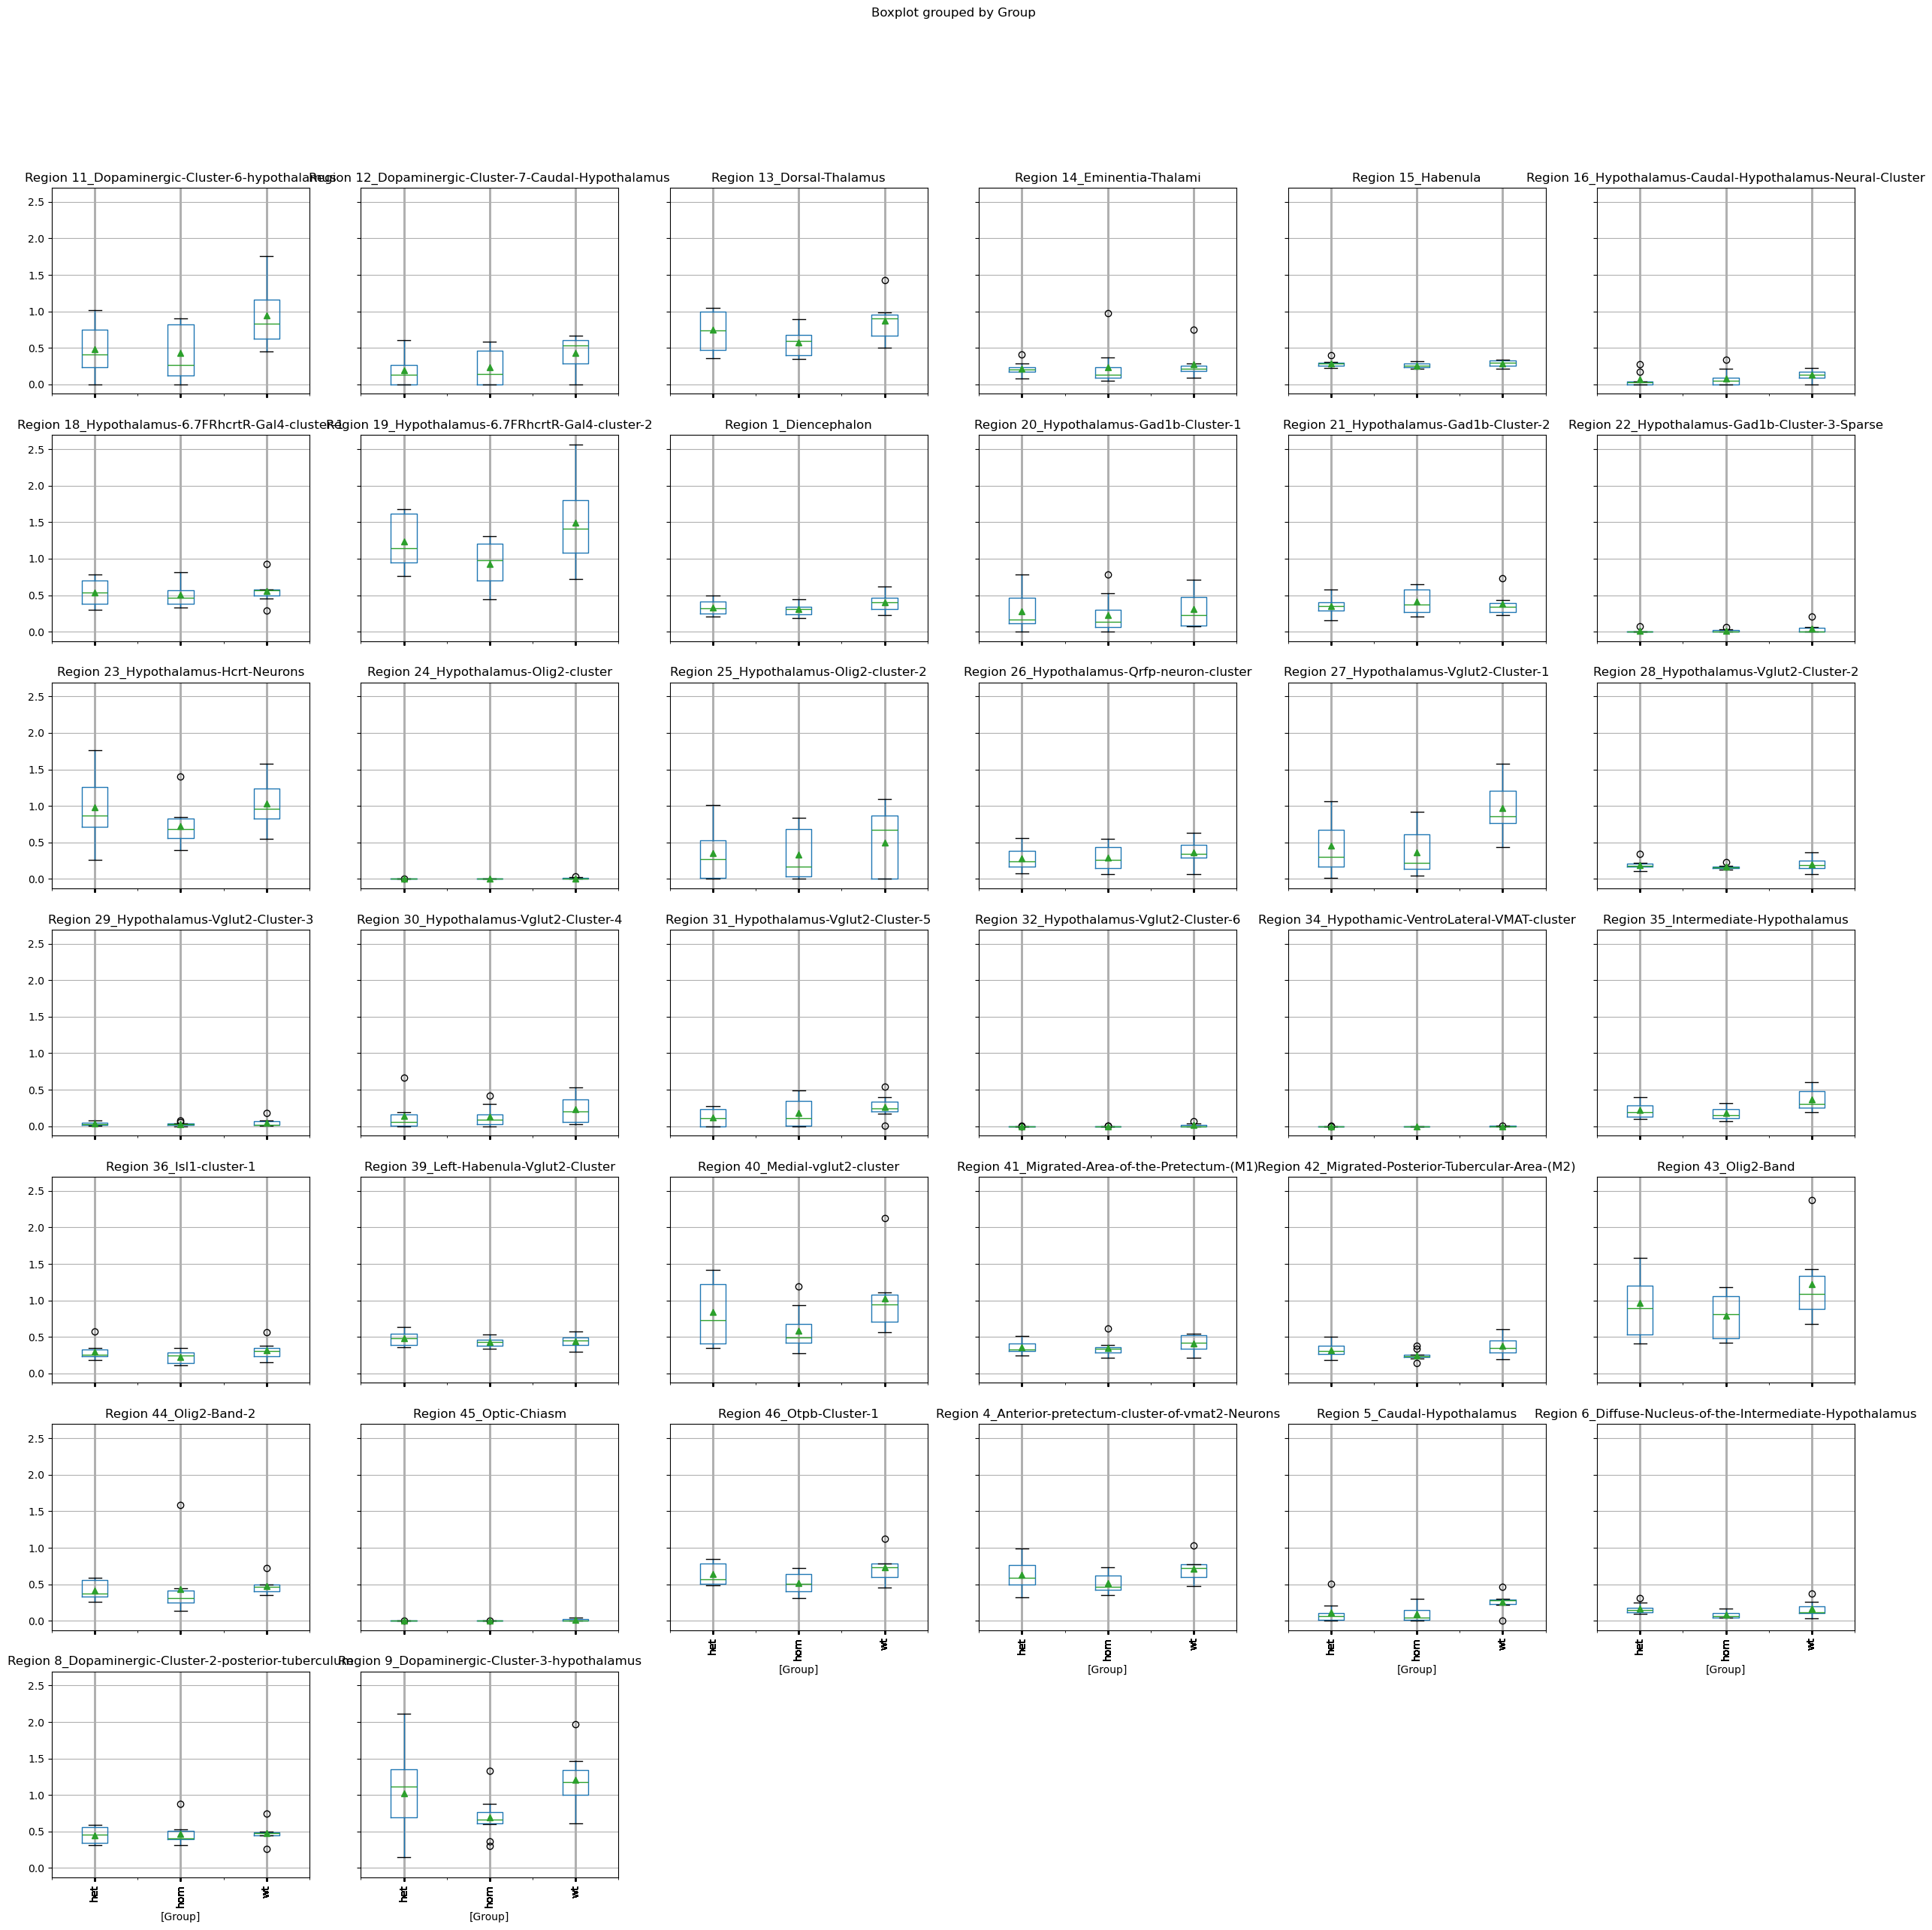

In [20]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(1000,1000))

concatenated_df.iloc[:,:40].boxplot(by='Group', rot=90, figsize=(30,30),showmeans=True)
# another style
#concatenated_df.iloc[:,:40].boxplot(by='Group', rot=90, figsize=(40,40), patch_artist=True, showmeans=True)
plt.show()